<a href="https://colab.research.google.com/github/rioAgustian/Fisika-Komputasi/blob/main/damped_spring_mass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Osilasai Sistem Pegas Massa Teredam

Persamaan gerak
  
\begin{align}
\vec{a}=-\frac{c}{m}\vec{v} -\frac{k}{m}\vec{y}
\end{align}



$\vec{a}$ = percepatan benda 

$\vec{v}$ = kecepatan benda

$\vec{y}$ = posisi benda

$m$ = massa benda

$k$ = konstanta pegas

$c$ = koefisien redaman fluida

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [18]:
# parameter
c = 0.2 # kg/s
k = 0.9 # N/m
m = 1   # kg

# merapikan parameter
params = (c, k, m)

In [19]:
# model persamaan diferensial
def dSdt(t, S, c, k, m):
  y, v = S
  return [v,
          -c/m * v - k/m * y]

In [20]:
# kondisi awal / initial values
y0 = 0.02 # m
v0 = 0    # m/s

# merapikan kondisi awal
S0 = (y0, v0)

# pewaktuan
min_t = 0
max_t = 50 

In [21]:
# menggunakan solve_ivp
sol = solve_ivp(dSdt, t_span=(min_t, max_t), 
                y0=S0, args=params, 
                rtol=10e-10, atol=10e-15)

# solusi
t = sol.t
y = sol.y[0]
v = sol.y[1]

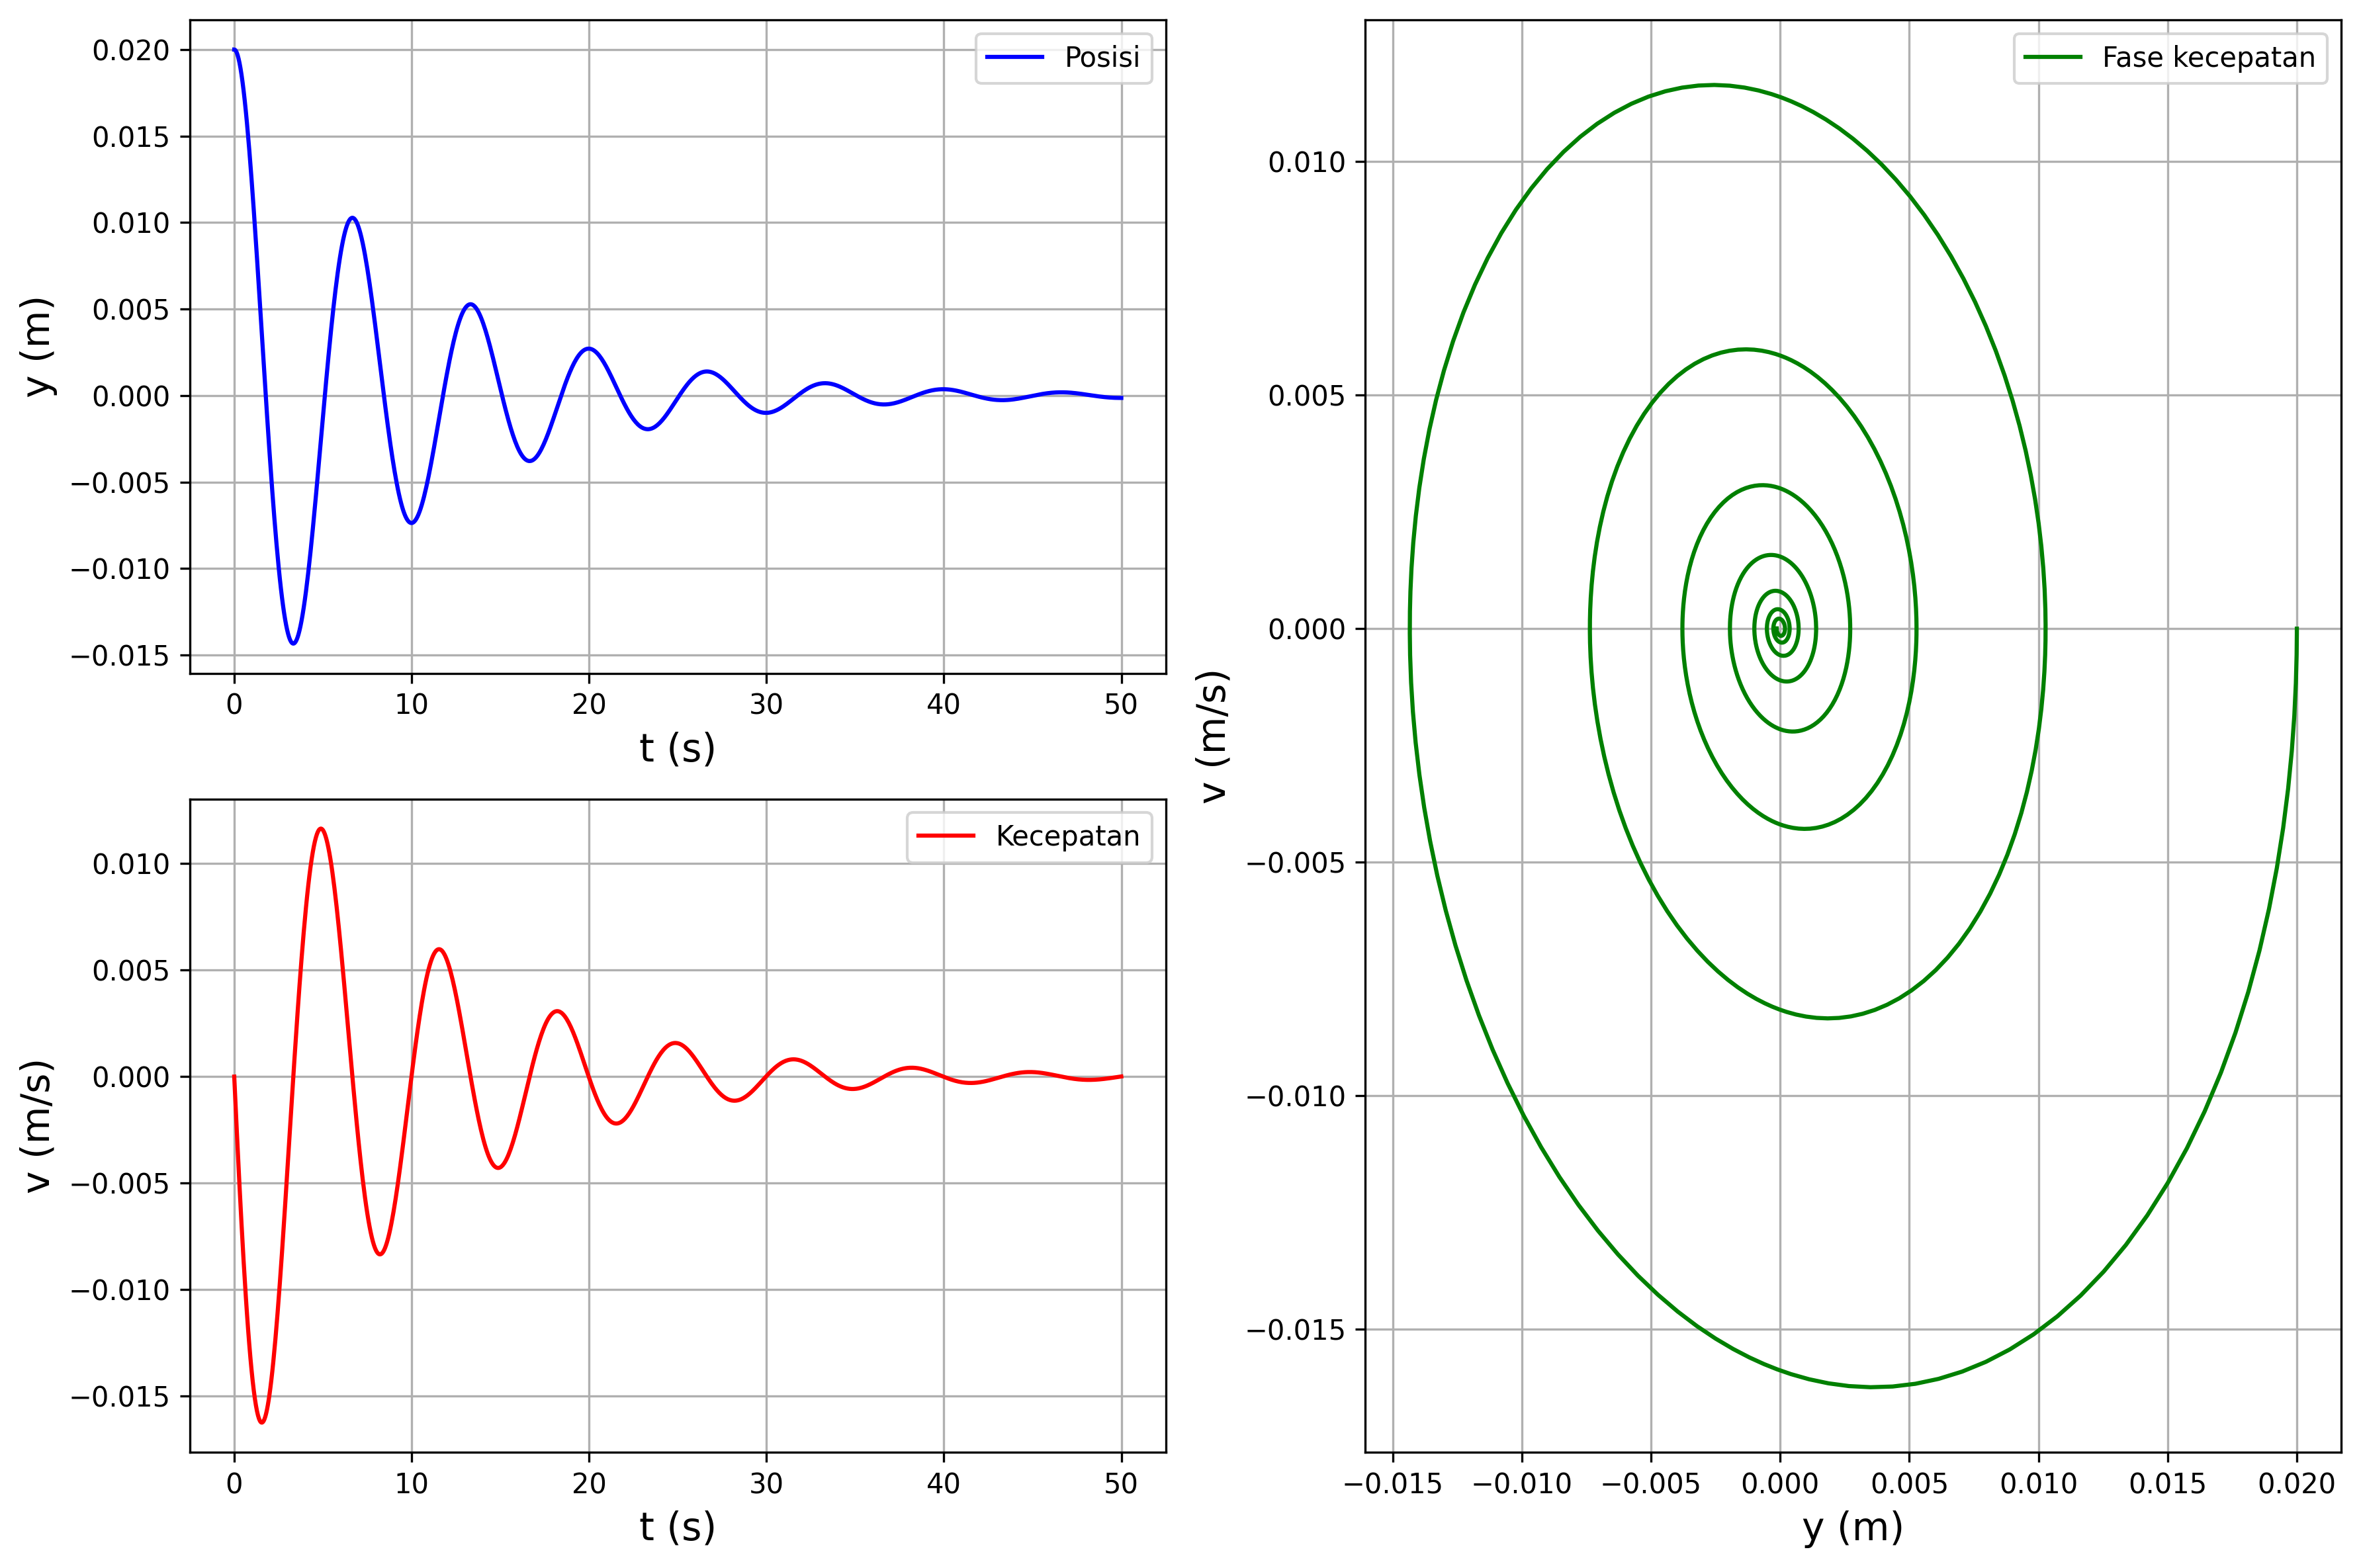

In [23]:
# plotting 
fig = plt.figure(dpi=300, figsize=(12, 8))

# 1st plot
ax1 = fig.add_subplot(221)
ax1.plot(t, y, "b", label="Posisi")
ax1.set_xlabel("t (s)", fontsize=14)
ax1.set_ylabel("y (m)", fontsize=14)
ax1.grid()
ax1.legend()

# 2nd plot
ax2 = fig.add_subplot(223)
ax2.plot(t, v, "r", label="Kecepatan")
ax2.set_xlabel("t (s)", fontsize=14)
ax2.set_ylabel("v (m/s)", fontsize=14)
ax2.grid()
ax2.legend()

# 3rd plot
ax3 = fig.add_subplot(122)
ax3.plot(y, v, "g", label="Fase kecepatan")
ax3.set_xlabel("y (m)", fontsize=14)
ax3.set_ylabel("v (m/s)", fontsize=14)
ax3.grid()
ax3.legend()

plt.tight_layout()
plt.show()